In [1]:
# what are the planned gaps in DDFs?
from baseline import ddf_surveys
import rubin_sim.scheduler.detailers as detailers

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [12]:
ddf_season_frac = 0.1
per_night = True
max_dither = 0.7
camera_ddf_rot_limit = 75.0  # degrees

u_detailer = detailers.FilterNexp(filtername="u", nexp=1)
dither_detailer = detailers.DitherDetailer(
    per_night=per_night, max_dither=max_dither
)
details = [
        detailers.CameraRotDetailer(
            min_rot=-camera_ddf_rot_limit, max_rot=camera_ddf_rot_limit
        ),
        dither_detailer,
        u_detailer,
        detailers.Rottep2RotspDesiredDetailer(),
    ]
euclid_detailers = [
    detailers.CameraRotDetailer(
        min_rot=-camera_ddf_rot_limit, max_rot=camera_ddf_rot_limit
    ),
    detailers.EuclidDitherDetailer(),
    u_detailer,
    detailers.Rottep2RotspDesiredDetailer(),
]
ddfs = ddf_surveys(
        detailers=details,
        season_unobs_frac=ddf_season_frac,
        euclid_detailers=euclid_detailers,
    )

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


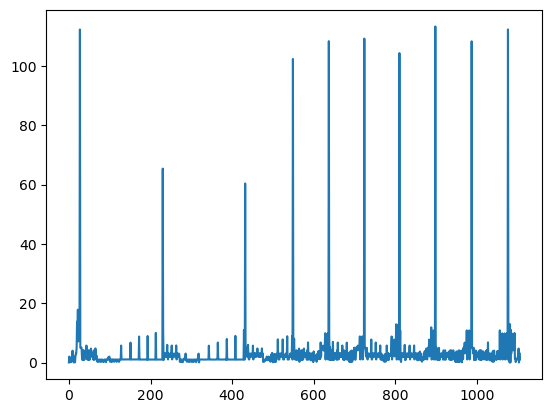

In [37]:
plt.plot(np.diff(np.unique(ddfs[0].scheduled_obs)))

In [18]:
ddfs[0]

<ScriptedSurvey survey_name='' at 0x29b8bd510>

In [22]:
ddfs

[<ScriptedSurvey survey_name='' at 0x2b22fd150>,
 <ScriptedSurvey survey_name='' at 0x29b8bd510>]

In [14]:
indx = np.where(ddfs[0].obs_wanted['note'] == 'DD:ELAISS1')[0]

In [15]:
np.diff(np.round(np.unique(ddfs[0].scheduled_obs[indx])))

array([13.,  1.,  4.,  6.,  6., 14.,  1.,  2., 64., 25.,  7., 10., 10.,
        9., 10., 11.,  8., 10., 11.,  9.,  9., 10., 10., 10.,  9., 10.,
       10., 10.,  9., 10., 10., 10.,  9., 10., 10.,  9., 12.,  8., 67.,
       25., 10., 10., 10.,  9., 10., 10.,  9., 10., 10., 10.,  9., 10.,
       10., 10.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9., 10., 10.,
       10.,  9., 87.,  1., 14., 10., 10., 10.,  9., 10., 10.,  9., 10.,
       10., 10.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9., 10., 10.,
       10.,  9., 10., 10.,  9., 10., 11., 67., 25.,  9., 10., 10.,  9.,
       10., 10., 10., 10.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9.,
       10., 10., 10.,  9., 10., 10., 10., 10., 18.,  1., 10., 66., 26.,
       10., 10., 10.,  9., 10., 10.,  9., 10., 10., 10.,  9., 10., 10.,
       10.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9., 10., 18.,  1.,
       10., 83.,  1., 24.,  4., 10., 14.,  5., 10., 10.,  9., 10., 10.,
       10.,  9., 10., 10., 10., 13.,  6., 10., 13.,  6., 10., 10

In [33]:
np.diff(np.round(np.unique(ddfs[0].scheduled_obs[indx])))

array([  2.,   3.,   1.,   8.,   1.,   1.,   1.,   1.,   1., 150.,   7.,
         8.,  10.,   4.,   8.,   7.,  10.,   5.,   7.,   7.,   9.,   6.,
         7.,   7.,   9.,   6.,   7.,   8.,   8.,   6.,   7.,   8.,   8.,
         6.,   8.,   7.,   9.,   6.,   7., 153.,   7.,   8.,   7.,   8.,
         7.,   7.,   7.,   8.,   7.,   8.,   7.,   7.,   7.,   8.,   7.,
         8.,   7.,   7.,   7.,   8.,   7.,   8.,   7.,   7.,   7.,   8.,
         7.,   8.,  13., 149.,   5.,   8.,   7.,  10.,   5.,   7.,   7.,
        10.,   5.,   7.,   7.,   9.,   6.,   7.,   8.,   8.,   6.,   8.,
         7.,   8.,   6.,   8.,   7.,   9.,   6.,   7.,   7.,  10.,   5.,
       153.,   7.,   8.,   7.,   7.,   8.,   7.,   7.,   8.,   7.,   7.,
         7.,   8.,   7.,   7.,   8.,   7.,   7.,   8.,   7.,   7.,   7.,
         8.,   7.,   7.,   8.,   7.,   7.,   8.,   7., 153.,   9.,   6.,
         7.,   7.,  10.,   5.,   7.,   8.,  10.,   4.,   7.,   8.,   9.,
         5.,   8.,   7.,   9.,   6.,   7.,   7.,   

In [3]:
np.unique(ddfs[0].obs_wanted['note'])

array(['DD:COSMOS', 'DD:ECDFS', 'DD:ELAISS1', 'DD:XMM_LSS'], dtype='<U40')